<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [14]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_palette("Set2")
%matplotlib inline

In [15]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(r"D:\IOD\Data\Datasets 2\housing.data", header=None, names=names, delim_whitespace=True)

In [16]:
# Head
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [17]:
# Shape
data.shape

(506, 14)

In [26]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


##### 1. Plot Histogram of `RM`

<AxesSubplot:ylabel='Frequency'>

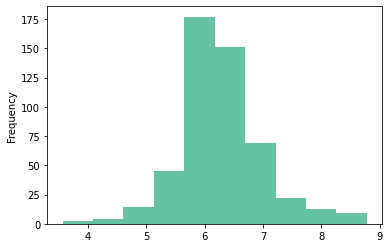

In [28]:
#  ANSWER
# RM - average number of rooms per dwelling
data['RM'].plot(kind='hist')

##### 2. Plot Histogram of `MEDV`

<AxesSubplot:ylabel='Frequency'>

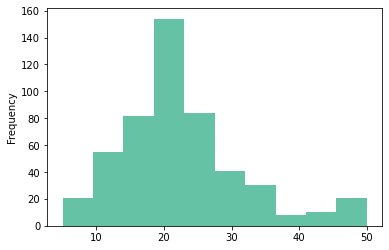

In [29]:
# ANSWER
# MEDV - Median value of owner-occupied homes in $1000's
data['MEDV'].plot(kind='hist')

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

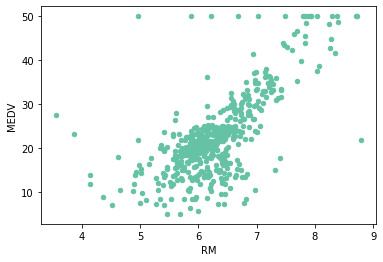

In [30]:
# ANSWER
data.plot(kind= 'scatter', x = 'RM', y = 'MEDV')

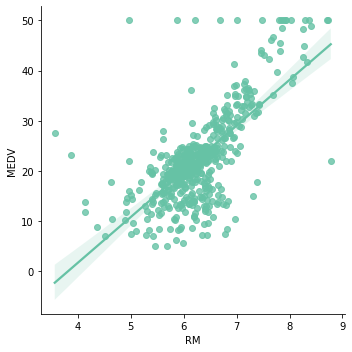

In [31]:
sns.lmplot(data = data, x = 'RM', y = 'MEDV');

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

Yes, the relationship between RM and MEDV is linear

In [32]:
data.RM.mean()

6.284634387351787

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [33]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [34]:
data.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7

In [50]:
# ANSWER
# RM - average number of rooms per dwelling
N = 100
large = data[data['RM'] >= 6]
small = data[data['RM'] <6]
print(large.shape)
print(small.shape)

(333, 14)
(173, 14)


In [51]:
large_sample = large.sample(N, random_state =42)
small_sample = small.sample(N, random_state =42)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

<AxesSubplot:>

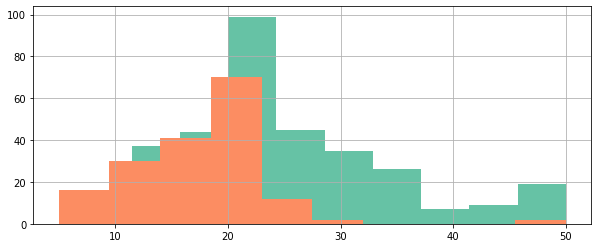

In [58]:
# ANSWER
large['MEDV'].hist(figsize=[10,4],label = 'Large House')
small['MEDV'].hist(figsize=[10,4],label = 'Small House')

In [61]:
condition = data['RM'] >= 6
data['house_size'] = condition
data['house_size'] = data['house_size'].map({True: 'Large', False: 'Small'})
data.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   

   PTRATIO       B  LSTAT  MEDV house_size  
0     15.3  396.90   4.98  24.0      Large  
1     17.8  396.90   9.14  21.6      Large  
2     17.8  392.83   4.03  34.7      Large

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

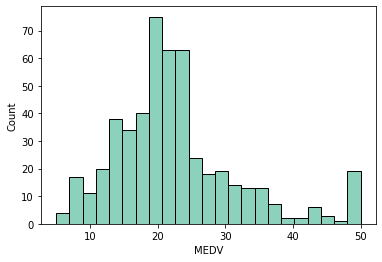

In [74]:
# Whole data with MEDV
sns.histplot(data['MEDV'])

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

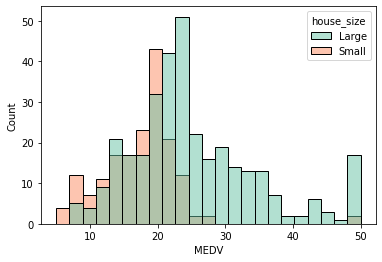

In [78]:
# Whole data with MEDV
sns.histplot(data= data, x = 'MEDV', hue = 'house_size')

C:\Users\Clivia\Anaconda3-2019.10\envs\IOD\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


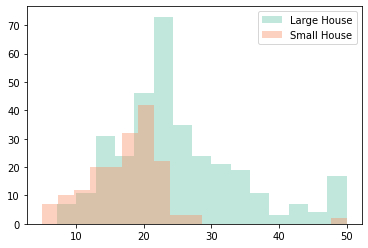

In [81]:
# Whole data with MEDV
ax = sns.distplot(large['MEDV'], label='Large House', kde=False);
sns.distplot(small['MEDV'], ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

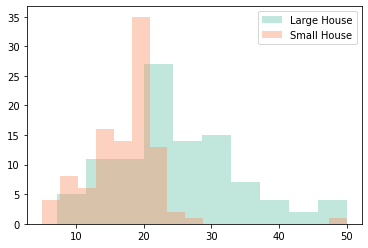

In [82]:
# samples
ax = sns.distplot(large_sample['MEDV'], label='Large House', kde=False);
sns.distplot(small_sample['MEDV'], ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

##### 7. Calculate Variance

Calculate variance for both samples.

In [100]:
large_medv_sample = large['MEDV'].sample(N, random_state =42)
small_medv_sample = small['MEDV'].sample(N, random_state =42)

In [101]:
# ANSWER
large_co = large_medv_sample.var()
small_co = small_medv_sample.var()
print('large_co: ', large_co)
print('small_co: ', small_co)

large_co:  84.00822121212123
small_co:  32.564099999999996


In [102]:
# Solutions
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N, random_state =42)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N, random_state =42)
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

84.00822121212123
32.564099999999996


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [103]:
# ANSWER
sp = np.sqrt((large_co + small_co)/2)
sp

7.634537353766802

In [110]:
#solutions
# ANSWER
std = np.sqrt((var_medv_over_6 + var_medv_under_6) / 2)
print('std dev:', std)

std dev: 7.634537353766802


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [111]:
# ANSWER
t = (large_medv_sample.mean() - small_medv_sample.mean())/(sp*np.sqrt(2/N))
t

7.279890113294252

In [117]:
#solutions
# ANSWER
ts = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('ts:', ts)

ts: 7.279890113294252


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [115]:
# ANSWER
df = 2*N -2
df
# If its one sample test, df = N -1

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [150]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)
print(p*2)
p

7.686073999479959e-12


3.843036999739979e-12

In [119]:
#solutions
# ANSWER
p = 1 - stats.t.cdf(abs(ts), df=df)  # #p-value after comparison with the t 
print("ts = " + str(ts))
print("p = " + str(2 * p))

ts = 7.279890113294252
p = 7.686073999479959e-12


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [132]:
# ANSWER
null_hypothesis= {
    'H0': 'there is no difference between distribution of `Large House` & `Small House`.',
    'HA': 'there is difference between distribution of `Large House` & `Small House`.'
}

In [134]:
# ANSWER
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.So", null_hypothesis['HA'] )
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.So", null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [135]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = 7.279890113294252
p = 7.686073999479959e-12
We reject our null hypothesis.So there is difference between distribution of `Large House` & `Small House`.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [145]:
# ANSWER # solutions
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['HA']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['HA']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [147]:
# ANSWER # solutions
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: a sample and b sample of two datasets. The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [148]:
# ANSWER # solutions
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 7.279890113294252
p = 7.686073999479959e-12
We reject our null hypothesis.
there is difference between distribution of `Large House` & `Small House`.


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [149]:
#solutions
# ANSWER
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 7.27989011329426
p = 7.686055825655334e-12
We reject our null hypothesis.So there is difference between distribution of `Large House` & `Small House`.




---



---



> > > > > > > > > Â© 2022 Institute of Data


---



---



